In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

In [3]:
train = pd.read_csv('F:\\Data\\timeAnalysis\\train.csv')

C:\Users\Administrator\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train.head(5)

,sale_date,class_id,sale_quantity,brand_id,compartment,type_id,level_id,department_id,TR,gearbox_type,...,engine_torque,car_length,car_width,car_height,total_quality,equipment_quality,rated_passenger,wheelbase,front_track,rear_track
0,201609,289403,94,12,2,1,1,1,6,MT,...,170,4440,1833,1545,1695,1320,5,2700,1556,1562
1,201609,745137,435,637,3,2,1,2,6,DCT,...,159,4534,1823,1483,1711,1336,5,2648,1553,1544
2,201609,714860,180,831,3,2,2,3,6,AT,...,176,4720,1815,1465,1860,1459,5,2770,1579,1589
3,201609,175962,40,750,3,2,1,4,6,AT,...,155,4475,1706,1469,1625,1145,5,2603,1460,1500
4,201609,270690,19,98,2,3,3,1,5,MT,...,146.5,4415,1685,1850,1825,1236,5,2720,1420,1440


In [149]:
irene = train['sale_date'].unique()
irene = np.append(irene,201711)
irene = np.append(irene,201712)
irene.sort(axis=0)
irene

array([201201, 201202, 201203, 201204, 201205, 201206, 201207, 201208,
       201209, 201210, 201211, 201212, 201301, 201302, 201303, 201304,
       201305, 201306, 201307, 201308, 201309, 201310, 201311, 201312,
       201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408,
       201409, 201410, 201411, 201412, 201501, 201502, 201503, 201504,
       201505, 201506, 201507, 201508, 201509, 201510, 201511, 201512,
       201601, 201602, 201603, 201604, 201605, 201606, 201607, 201608,
       201609, 201610, 201611, 201612, 201701, 201702, 201703, 201704,
       201705, 201706, 201707, 201708, 201709, 201710, 201711, 201712], dtype=int64)

In [150]:
ireneDf = pd.DataFrame(irene,columns=['sale_date'])
indexDf = pd.DataFrame(list(range(1,len(ireneDf)+1)),columns=['month'])
month = ireneDf.merge(indexDf,left_index=True,right_index=True)
month['mm'] = pd.to_datetime(month['sale_date'], format='%Y%m').dt.month
mm = [1,2,3,4,5,6,7,8,9,10,11,12]
MM = ['JAN','FEB','MAR','APR','MAY','JUN','JULY','AUG','SEPT','OCT','NOV','DEC']
for i in MM:
    month[i] = (MM.index(i)+1 == month['mm']).astype(float)
del month['mm']

In [151]:
month.drop(['sale_date','month'],axis=1)

,JAN,FEB,MAR,APR,MAY,JUN,JULY,AUG,SEPT,OCT,NOV,DEC
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [147]:
a = train['class_id'].sample(1).iloc[0]
print(a)
asmaa = train[train['class_id'] == a][['sale_date','sale_quantity']]
asmaa = asmaa.groupby(['sale_date'],as_index=False).sale_quantity.sum()
startDate = asmaa.sale_date.min()
endDate = asmaa.sale_date.max()

asmaa = asmaa.merge(month,on='sale_date',how='right')
asmaa = asmaa.sort_values('sale_date')

startMonth = asmaa[asmaa['sale_date'] == startDate]['month'].iloc[0]
endMonth = asmaa[asmaa['sale_date'] == endDate]['month'].iloc[0]

model = LinearRegression(fit_intercept=False)
model.fit(asmaa[(asmaa['sale_date'] >= startDate) & (asmaa['sale_date'] <= endDate)].drop(['sale_date','sale_quantity'],axis=1),
          asmaa[(asmaa['sale_date'] >= startDate) & (asmaa['sale_date'] <= endDate)]['sale_quantity'])

asmaa = asmaa.set_value(asmaa[asmaa['month'] == startMonth-1].index,'sale_quantity',
                model.predict(asmaa[asmaa['month'] == startMonth-1].drop(['sale_date','sale_quantity'],axis=1))[0])

#model.predict(asmaa[asmaa['month'] == startMonth-1].drop(['sale_date','sale_quantity'],axis=1))[0]

245609


In [137]:
asmaa[asmaa['month'] == startMonth-1].drop(['sale_date','sale_quantity'],axis=1)

,month,JAN,FEB,MAR,APR,MAY,JUN,JULY,AUG,SEPT,OCT,NOV,DEC
76,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [148]:
asmaa

,sale_date,sale_quantity,month,JAN,FEB,MAR,APR,MAY,JUN,JULY,AUG,SEPT,OCT,NOV,DEC
19,201105,NaN,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,201106,NaN,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
21,201107,NaN,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
22,201108,NaN,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
23,201109,NaN,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
24,201110,NaN,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25,201111,NaN,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26,201112,NaN,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27,201201,NaN,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,201202,NaN,10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
a = train['class_id'].sample(1).iloc[0]
asmaa = train[train['class_id'] == a][['sale_date','sale_quantity']]
asmaa = asmaa.groupby(['sale_date'],as_index=False).sale_quantity.sum()
asmaa = asmaa.merge(month,on='sale_date')
asmaa = asmaa.sort_values('sale_date')

model = LinearRegression(fit_intercept=False)
model.fit(asmaa.drop(['sale_date','sale_quantity'],axis=1),asmaa['sale_quantity'])

asmaa['lag1'] = asmaa['sale_quantity'].shift(1)
asmaa['lag2'] = asmaa['sale_quantity'].shift(2)

na = asmaa[asmaa['sale_date'] == asmaa['sale_date'].min()].sale_quantity.iloc[0]
asmaa = asmaa.fillna({'lag1':na,'lag2':na})

In [28]:
asmaa

,sale_date,sale_quantity,month,JAN,FEB,MAR,APR,MAY,JUN,JULY,AUG,SEPT,OCT,NOV,DEC,lag1,lag2
0,201201,428,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,428.0,428.0
1,201202,276,10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,428.0,428.0
2,201203,228,11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,276.0,428.0
3,201204,186,12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,228.0,276.0
4,201205,311,13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,186.0,228.0
5,201206,297,14,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,311.0,186.0
6,201207,255,15,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,297.0,311.0
7,201208,325,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,255.0,297.0
8,201209,166,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,325.0,255.0
9,201210,83,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,166.0,325.0


In [1197]:
train.dtypes

sale_date                  int64
class_id                   int64
sale_quantity              int64
brand_id                   int64
compartment                int64
type_id                    int64
level_id                  object
department_id              int64
TR                        object
gearbox_type              object
displacement             float64
if_charging               object
price_level               object
price                     object
driven_type_id             int64
fuel_type_id              object
newenergy_type_id          int64
emission_standards_id      int64
if_MPV_id                  int64
if_luxurious_id            int64
power                     object
cylinder_number            int64
engine_torque             object
car_length                 int64
car_width                  int64
car_height                 int64
total_quality              int64
equipment_quality          int64
rated_passenger           object
wheelbase                  int64
front_trac

178529


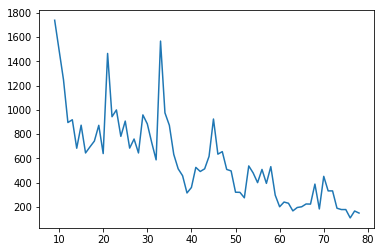

In [36]:
#asmaa = train[['sale_date','sale_quantity']]
a = train['class_id'].sample(1).iloc[0]
asmaa = train[train['class_id'] == a][['sale_date','sale_quantity']]
#asmaa = train[train['class_id'] == 978089][['sale_date','sale_quantity']]
asmaa = asmaa.groupby(['sale_date'],as_index=False).sale_quantity.sum()
asmaa = asmaa.merge(month,on='sale_date')


asmaa = asmaa.sort_values('sale_date')
asmaa['lag1'] = asmaa['sale_quantity'].shift(1)
asmaa['lag2'] = asmaa['sale_quantity'].shift(2)
na = asmaa[asmaa['sale_date'] == asmaa['sale_date'].min()].sale_quantity.iloc[0]
asmaa = asmaa.fillna({'lag1':na,'lag2':na})

plt.plot(asmaa['month'],asmaa['sale_quantity'])
print(a)

-26057.4491952


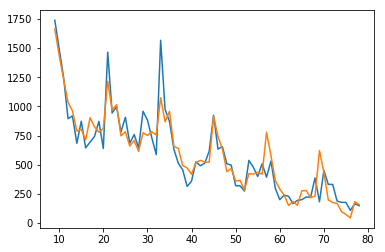

In [41]:
column_names=['JAN','FEB','MAR','APR','MAY','JUN','JULY','AUG','SEPT','OCT','NOV','DEC','lag1','lag2',
             'month']
X = asmaa[column_names]
y = asmaa['sale_quantity']

#poly_model = make_pipeline(PolynomialFeatures(1),LinearRegression())
#poly_model.fit(X, y)
model = LinearRegression(fit_intercept=False)
model.fit(X,y)

plt.plot(asmaa['month'],asmaa['sale_quantity'])
plt.plot(asmaa['month'],model.predict(X))
#plt.plot(month['month'],poly_model.predict(month[column_names]))
#print(poly_model.predict(month[month['month'] == 71][column_names]))
print(cross_val_score(model,X,y,cv=LeaveOneOut(),scoring='neg_mean_squared_error').mean())
#print(mean_squared_error(y,poly_model.predict(X)))

In [1278]:
poly_model.fit?

In [1464]:
test = pd.read_csv('F:\\Data\\timeAnalysis\\test.csv')
column_names=['JAN','FEB','MAR','APR','MAY','JUN','JULY','AUG','SEPT','OCT','NOV','DEC','lag1','lag2','lag3','month']
score = 0
for index, row in test.iterrows():
        asmaa = train[train['class_id'] == row['class_id']][['sale_date','sale_quantity']]
        asmaa = asmaa.groupby(['sale_date'],as_index=False).sale_quantity.sum()
        asmaa = asmaa.merge(month,on='sale_date')
        
        asmaa = asmaa.sort_values('sale_date')
        asmaa['lag1'] = asmaa['sale_quantity'].shift(1)
        asmaa['lag2'] = asmaa['sale_quantity'].shift(2)
        asmaa['lag3'] = asmaa['sale_quantity'].shift(3)
        na = asmaa[asmaa['sale_date'] == asmaa['sale_date'].min()].sale_quantity.iloc[0]
        asmaa = asmaa.fillna({'lag1':na,'lag2':na,'lag3':na})
        
        X = asmaa[column_names]
        y = asmaa['sale_quantity']

        model = LinearRegression(fit_intercept=False)
        model.fit(X,y)
        score = score - cross_val_score(model,X,y,cv=LeaveOneOut(),scoring='neg_mean_squared_error').mean()
score

469911530.08297473

# test

In [40]:
test = pd.read_csv('F:\\Data\\timeAnalysis\\test.csv')

In [78]:
test

,predict_date,class_id,predict_quantity
0,201711,103507,NaN
1,201711,124140,NaN
2,201711,125403,NaN
3,201711,136916,NaN
4,201711,169673,NaN
5,201711,175962,NaN
6,201711,178529,NaN
7,201711,186250,NaN
8,201711,194201,NaN
9,201711,194450,NaN


In [72]:
len(test)

140

In [74]:
train[['sale_date','sale_quantity','class_id']].groupby(['sale_date','class_id'],as_index=False).sale_quantity.sum().\
sort_values('sale_date',ascending=False)

,sale_date,class_id,sale_quantity
5586,201710,978089,400
5490,201710,378536,105
5496,201710,401052,134
5495,201710,395234,102
5494,201710,392593,193
5493,201710,384924,765
5492,201710,379876,133
5491,201710,379265,314
5489,201710,378356,422
5498,201710,412240,68


In [75]:
t = train[['sale_date','sale_quantity','class_id']].groupby(['sale_date','class_id'],as_index=False).sale_quantity.sum().\
sort_values('sale_date',ascending=False)

In [77]:
t.groupby(['class_id'],as_index=False).first()

,class_id,sale_date,sale_quantity
0,103507,201710,180
1,124140,201710,263
2,125403,201710,156
3,136916,201710,162
4,169673,201710,152
5,175962,201710,237
6,178529,201710,148
7,186250,201710,83
8,194201,201710,378
9,194450,201710,271


In [81]:
result = test.merge(t.groupby(['class_id'],as_index=False).first(),on='class_id')
result = result[['predict_date','class_id','sale_quantity']].rename(columns={'sale_quantity':'predict_quantity'})

In [83]:
result.to_csv('F:\\Data\\timeAnalysis\\submission.csv',index=False)

In [82]:
result

,predict_date,class_id,predict_quantity
0,201711,103507,180
1,201711,124140,263
2,201711,125403,156
3,201711,136916,162
4,201711,169673,152
5,201711,175962,237
6,201711,178529,148
7,201711,186250,83
8,201711,194201,378
9,201711,194450,271
